## Deriving the Black-Scholes-Merton Equation

In this section, we derive the Black-Scholes-Merton partial differential equation, which is one of the central results in financial mathematics. It describes how the price of an option evolves when the underlying asset follows a geometric Brownian motion.

The key idea behind this derivation is based on the no-arbitrage principle and the concept of constructing a self-financing and risk-free portfolio. This is the continuous-time analogue of the replication argument used in the binomial model.

### Evolution of the portfolio value

Consider an investor who holds a self-financing portfolio with total value $X(t)$ at time $t$. The portfolio consists of:

A risky asset (a stock) with price $S(t)$, which follows a geometric Brownian motion.

A risk-free money market account earning a constant interest rate $r$.

The dynamics of the stock price $S(t)$ are given by:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

where:

- $\alpha$ is the expected rate of return of the stock.
- $\sigma$ is the volatility.
- $W(t)$ is a standard Brownian motion.

At time $t$, the investor holds $\Lambda(t)$ shares of the stock. The remaining amount, $X(t) - \Lambda(t) S(t)$, is invested in the risk-free account.

The dynamics of the portfolio value are:

$$
dX(t) = \Lambda(t)dS(t) + r(X(t) - \Lambda(t)S(t))dt
$$

Substitunting the dynamics of S(t) into X(t), we obtain:

$$
\begin{align}
dX(t) = \Lambda(t)(\alpha S(t)dt + \sigma S(t)dW(t)) + r(X(t) - \Lambda(t)S(t))dt\\
= rX(t)dt + (\alpha - r)\Lambda(t)S(t)dt + \Lambda(t)\sigma S(t)dW(t)
\end{align}
$$

Interpretation of the terms:

- $r X(t) , dt$: risk-free growth of the total portfolio.
- $\Lambda(t) (\alpha - r) S(t) , dt$: excess return from holding the risky asset.
- $\Lambda(t) \sigma S(t) , dW(t)$: random fluctuation due to stock price volatility.

### Discounted Portfolio and Stock Price

We now understand how to estimate how both the sotck price as well as the portfolio of a stock and a risk-free asset evolves. 

However, this equation includes the risk-free rate $r$.
In finance, we always discount the prices by $e^{-r t}$ to move into the risk-neutral world and remove the risk-free growth.

This now brings two additional quesitons:

- How does the discounted stock price evolve?
- How does the discounted portfolio value evolve?

To proceed with the hedging argument, we simplify the dynamics by working with discounted values:

- Discounted stock price: $e^{-r t} S(t)$
- Discounted portfolio value: $e^{-r t} X(t)$

This removes the deterministic growth at rate $r$ and allows us to isolate the risky part of the price process.

To compute this, we can now finally get back to the Ito-Doeblin formula. 

#### The need for the Ito Doeblin formula for discounted stock and portfolio evolution

In order to understand how the stock price evolves over time, we need to calculate $d(e^{-rt}S(t))$.

In ordinary calculus, when we compute the differential of a product like $e^{-r t} S(t)$, we would simply use the product rule:

$$
d(e^{-rt}S(t)) = \frac{d}{dt}e^{-rt}S(t)dt + e^{-rt}dS(t)
$$

However, this rule only works if $S(t)$ is differentiable.
In our case, $S(t)$ follows a stochastic differential equation:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

The process $W(t)$ is a Brownian motion and is nowhere differentiable.
This means that:

- $S(t)$ is not differentiable.
- Its path is rough and has non-zero quadratic variation.

Therefore, ordinary calculus breaks down.

The **product rule and chain rule from classical calculus** are **no longer valid** because they ignore the **impact of the randomness and roughness of $W(t)$**.

As we showed before, the Itô-Doeblin formula is a generalized chain rule specifically designed for functions of stochastic processes.

It modifies the usual chain rule by adding an additional correction term that accounts for the nonzero quadratic variation of Brownian motion.

We were able to show the result of the formula for both a variable which depends only on a stochastic process (one variable Itô-Doeblin):

$$
df(W(t)) = f'(W(t))dW(t) + \frac{1}{2}f''(W(t))dt
$$

and one which depends on both time and the stochastic process (two variable Itô-Doeblin):

$$
df(t, W(t)) = f_t(t, W(t))dt + f_x(t, W(t))dW(t) + \frac{1}{2}(t, W(t))d[W,W](t)
$$

#### Using the Ito Doeblin formula to obtain the discounted stock and portfolio evolutions

Now that we recapitulated the need for the Ito-Doeblin formula, we can apply it to both the discounted stock movements as well as the discounted portfolio movements.

##### Evolution of the stock price

For the dynamics of the stock price we get: 

$$
\begin{align}
d(e^{-rt}S(t)) = f_t(t, S(t))dt + f_{S(t)}(t, S(t))dS(t) + \frac{1}{2}f_{S(t)S(t)}(t, S(t))dS(t)dS(t)
\end{align}
$$

Here, we have three terms:

- $f_t(t, S(t)) = -re^{-rt}S(t)$
- $f_{S(t)}(t, S(t)) = e^{-rt}$
- $f_{S(t)S(t)}(t, S(t))dS(t) = 0$

Note that the third term is simply zero because $f(t, x)$ is affine (linear) in $x$. If it were nonlinear (e.g. $x^2$ etc), the term would not vanish as the quadratic variation matters. 

So, for the dynamics of the Stock, we obtain:

$$
\begin{align}
d(e^{-rt}S(t)) = f_t(t, S(t))dt + f_{S(t)}(t, S(t))dS(t) + \frac{1}{2}f_{S(t)S(t)}(t, S(t))dS(t)dS(t) \\
= -re^{-rt}S(t)d(t) + e^{-rt}dS(t) \\
= -re^{-rt}S(t)dt + e^{-rt}(\alpha S(t)dt + \sigma S(t)dW(t))\\
= (\alpha - r)e^{-rt}S(t)dt + \sigma e^{-rt}S(t)dW(t)
\end{align}
$$

##### Evolution of the portfolio value

For the dynamics of the portfolio value we get:

$$
\begin{align}
d(e^{-rt}X(t)) = f_t(t, X(t))dt + f_{X(t)}(t, X(t))dX(t) + \frac{1}{2}f_{X(t)X(t)}(t, X(t))dX(t)dX(t)
\end{align}
$$

Here, we have three terms:

- $f_t(t, X(t)) = -re^{-rt}X(t)$
- $f_{X(t)}(t, X(t)) = e^{-rt}$
- $f_{X(t)X(t)}(t, X(t))dX(t) = 0$

whereas the third term is again zero due to the affinity (linearity).

Substituting this into the preliminary equation, we obtain:

$$
\begin{align}
d(e^{-rt}X(t)) = f_t(t, X(t))dt + f_{X(t)}(t, X(t))dX(t) + \frac{1}{2}f_{X(t)X(t)}(t, X(t))dX(t)dX(t) \\
= -re^{-rt}X(t)dt + e^{-rt}(rX(t)dt + (\alpha - r)\Lambda(t)S(t)d(t) + \Lambda(t)\sigma S(t)dW(t))\\
= \Lambda(t)(\alpha - r)e^{-rt}S(t)d(t) + \Lambda(t)\sigma e^{-rt}S(t)dW(t)\\
= \Lambda(t)((\alpha - r)e^{-rt}S(t)d(t) + \sigma e^{-rt}S(t)dW(t))\\
= \Lambda(t)d(e^{-rt}S(t))
\end{align}
$$

This result is crucial!

- It tells us that the change in the discounted portfolio value is **exactly caused£** by the **change in the discounted stock** price.

This will allow us to build a risk-free hedged portfolio in the next step, which leads to the Black-Scholes-Merton PDE.

### Evolution of the Option Value

In the previous section, we derived that the change in the discounted portfolio value is entirely driven by the change in the discounted stock price.

This result is crucial because it shows that by **dynamically adjusting the number of shares $\Lambda(t)$**, an investor can **perfectly replicate the evolution of the portfolio value** using **only the underlying asset** and the **money market account**. This is the foundation of the no-arbitrage replication argument in the Black-Scholes-Merton framework.

To price an option, we now apply the same logic:

We consider the value of the option itself as part of such a replicating portfolio. To do this, we need to analyze how the option price evolves over time as a function of both time $t$ and the underlying stock price $S(t)$.

The next step is therefore to apply the Itô-Doeblin formula to the option price process $c(t, S(t))$. This will allow us to express the stochastic dynamics of the option value, which is essential to derive the Black-Scholes-Merton equation.

**The European Call option**

Consider a European call option that pays $(S(T) - K)^+$ at time $T$, where $K$ is the strike price.
The value of this call option at time $t$ depends on:

- Time to maturity ($T - t$)
- Current stock price $S(t)$
- The parameters $r$ (risk-free rate), $\sigma$ (volatility), and $K$ (strike price)

We denote the option price function by:

$$
c(t,x)
$$

which is the price of the option at time $t$ when the stock price is $x$.
Importantly:

- $c(t, x)$ is deterministic (it is a function).
- However, the actual option price process is random and given by:

$$
c(t, S(t))
$$

since $S(t)$ is a stochastic process.

Our goal is to derive a differential equation for the function $c(t, x)$, so that we can express the future option price in terms of the future stock price.

#### Using the Ito Doeblin formula to obtain the evolution of the option value

We apply the Itô-Doeblin formula to the stochastic process $c(t, S(t))$.
Since $S(t)$ follows:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

the Itô-Doeblin formula yields:

$$
dc(t, S(t)) = c_t(t, S(t))dt + c_{S(t)}(t, S(t))dS(t) + \frac{1}{2}c_{S(t), S(t)}(t, S(t))dS(t)dS(t)
$$

where:

- $dS(t)dS(t) = \sigma^2S^2(t)dt$

Given this, we obtain:

$$
\begin{align}
dc(t, S(t)) = c_t(t, S(t))dt + c_{S(t)}(t, S(t))(\alpha S(t)dt + \sigma S(t)dW(t)) + \frac{1}{2}c_{S(t), S(t)}(t, S(t))\sigma^2S^2(t)dt\\
= (c_t(t, S(t)) + \alpha S(t)c_{S(t)}(t, S(t)) + \frac{1}{2}\sigma^2S^2(t)c_{S(t), S(t)}(t, S(t)))dt + \sigma S(t)c_{S(t)}dW(t)
\end{align}
$$

#### Using the Ito Doeblin formula to obtain the evolution of the discounted option value
 
Given the result above, we can now calculate the discounted option price process:

$$
e^{-rt}c(t, S(t))
$$

where:

$$
f(t,c(t, S(t)) = e^{-rt}c(t, S(t))
$$

For the dynamics of the discounted option value we get:

$$
\begin{align}
d(e^{-rt}c(t, S(t))) = f_t(t, c(t, S(t))dt + f_{c(t, S(t))}(t, c(t, S(t))dc(t, S(t)) + \frac{1}{2}f_{c(t, S(t))c(t, S(t))}(t, c(t, S(t))dc(t, S(t))dc(t, S(t))
\end{align}
$$

Here, we have three terms:

- $f_t(t, c(t, S(t)) = -re^{-rt}c(t, S(t))$
- $f_{c(t, S(t)}(t, c(t, S(t)) = e^{-rt}$
- $f_{c(t, S(t)c(t, S(t)}(t, c(t, S(t))dc(t, S(t) = 0$

So, we obtain:

$$
\begin{align}
d(e^{-rt}c(t, S(t))) = -re^{-rt}c(t, S(t))dt + e^{-rt}dc(t, S(t))\\
= e^{-rt}(-rc(t, S(t)) + c_t(t, S(t)) + \alpha S(t)c_{S(t)}(t, W(t)) + \frac{1}{2}\sigma^2S^2(t)c_{S(t), S(t)}(t, S(t)))dt + e^{-rt}\sigma S(t)c_{S(t)}dW(t)
\end{align}
$$

This decomposition is crucial because:

- It shows how the discounted option price evolves.
- It contains a drift term (the part multiplying $dt$) and a martingale term (the part multiplying $dW(t)$).

This is the key formula that will allow us to derive the Black-Scholes-Merton partial differential equation (PDE).

The next step in the Black-Scholes derivation will be to choose a self-financing portfolio that eliminates the randomness (the $dW(t)$ term), leading to a deterministic PDE for $c(t, x)$ — the famous Black-Scholes-Merton equation.

### Equating the Evolutions: Derivation of the Black-Scholes-Merton Equation

#### **Bridge from Previous Section**

In the previous section, we computed the dynamics of the **discounted option price** $e^{-r t} c(t, S(t))$ and showed how it evolves over time.  
We also derived the dynamics of the **discounted hedging portfolio value** $e^{-r t} X(t)$, which depends on how many shares $\Lambda(t)$ of the stock the investor holds at each time.

The key observation was:

$$
d(e^{-r t} X(t)) = \Lambda(t) \, d(e^{-r t} S(t)).
$$

Similarly, we computed:

$$
d(e^{-r t} c(t, S(t))).
$$

To perfectly replicate the option payoff, the portfolio value must always match the option value:

$$
X(t) = c(t, S(t)) \quad \text{for all } t \in [0, T].
$$

This is equivalent to requiring:

$$
d(e^{-r t} X(t)) = d(e^{-r t} c(t, S(t))) \quad \text{for all } t \in [0, T). \tag{4.5.8}
$$

Additionally, we need the initial condition:

$$
X(0) = c(0, S(0)).
$$

If these conditions hold, then:

$$
e^{-r t} X(t) = e^{-r t} c(t, S(t)) \quad \Rightarrow \quad X(t) = c(t, S(t)) \quad \text{for all } t \in [0, T].
$$

#### **Equating the Terms**

From earlier sections:

**Evolution of the discounted portfolio:**

$$
d(e^{-r t} X(t)) = \Lambda(t) (\alpha - r) e^{-r t} S(t) \, dt + \Lambda(t) \sigma e^{-r t} S(t) \, dW(t). \tag{4.5.5}
$$

**Evolution of the discounted option value:**

$$
\begin{aligned}
d(e^{-r t} c(t, S(t))) = {} & e^{-r t} \left( -r c(t, S(t)) + \frac{\partial c}{\partial t}(t, S(t)) + \alpha S(t) \frac{\partial c}{\partial x}(t, S(t)) \right. \\
& \left. + \frac{1}{2} \sigma^2 S^2(t) \frac{\partial^2 c}{\partial x^2}(t, S(t)) \right) dt \\
& + e^{-r t} \sigma S(t) \frac{\partial c}{\partial x}(t, S(t)) \, dW(t). \tag{4.5.7}
\end{aligned}
$$

To ensure replication of the option, we require:

$$
d(e^{-r t} X(t)) = d(e^{-r t} c(t, S(t))) \quad \text{for all } t \in [0, T).
$$


#### **Delta-Hedging Condition**

Comparing the dW(t) terms on both sides:

$$
\Lambda(t) = \frac{\partial c}{\partial x}(t, S(t)) \quad \text{for all } t \in [0, T). \tag{4.5.11}
$$

This is the **delta-hedging rule**:  

This equation tells us:

At each point in time, the number of shares to hold in the replicating portfolio is given by the delta of the option, which is the partial derivative of the option value with respect to the underlying price.

This is why it's called the delta hedge:

It adjusts the portfolio to **exactly match the infinitesimal change in the option value due to small changes in the stock price**.


#### **Black-Scholes-Merton PDE**

Now compare the dt terms and substitute $\Lambda(t) = \frac{\partial c}{\partial x}(t, S(t))$:

$$
(\alpha - r) S(t) \frac{\partial c}{\partial x}(t, S(t)) = -r c(t, S(t)) + \frac{\partial c}{\partial t}(t, S(t)) + \alpha S(t) \frac{\partial c}{\partial x}(t, S(t)) + \frac{1}{2} \sigma^2 S^2(t) \frac{\partial^2 c}{\partial x^2}(t, S(t)).
$$

Cancel the matching $\alpha S(t) \frac{\partial c}{\partial x}$ terms on both sides:

$$
r c(t, S(t)) = \frac{\partial c}{\partial t}(t, S(t)) + r S(t) \frac{\partial c}{\partial x}(t, S(t)) + \frac{1}{2} \sigma^2 S^2(t) \frac{\partial^2 c}{\partial x^2}(t, S(t)). \tag{4.5.13}
$$

So the **Black-Scholes-Merton Partial Differential Equation** becomes:

$$
\frac{\partial c}{\partial t}(t, x) + r x \frac{\partial c}{\partial x}(t, x) + \frac{1}{2} \sigma^2 x^2 \frac{\partial^2 c}{\partial x^2}(t, x) = r c(t, x), \quad \text{for all } t \in [0, T), x \geq 0. \tag{4.5.14}
$$

**Terminal condition (payoff at maturity):**

$$
c(T, x) = (x - K)^+. \tag{4.5.15}
$$


This is the **core mathematical result** behind the **Black-Scholes-Merton model** for option pricing.

#### **Solution to the Black-Scholes-Merton Equation**

The Black-Scholes-Merton partial differential equation (PDE) is:

$$
\frac{\partial c}{\partial t}(t, x) + r x \frac{\partial c}{\partial x}(t, x) + \frac{1}{2} \sigma^2 x^2 \frac{\partial^2 c}{\partial x^2}(t, x) = r c(t, x) \quad \text{for all } t \in [0, T),\ x > 0. \tag{4.5.14}
$$

With terminal condition (European call payoff):

$$
c(T, x) = (x - K)^+. \tag{4.5.15}
$$

And boundary conditions:

- At $x = 0$:
  $$
  c(t, 0) = 0 \quad \text{for all } t \in [0, T]. \tag{4.5.17}
  $$

- As $x \to \infty$:
  $$
  \lim_{x \to \infty} \left[ c(t, x) - \left( x - e^{-r(T - t)} K \right) \right] = 0 \quad \text{for all } t \in [0, T]. \tag{4.5.18}
  $$

#### **Closed-Form Solution**

The solution to the PDE is:

$$
c(t, x) = x\, N(d_+(t, x)) - K e^{-r(T - t)} N(d_-(t, x)), \quad \text{for } t \in [0, T),\ x > 0. \tag{4.5.19}
$$

Where:

$$
d_\pm(t, x) = \frac{\log\left(\frac{x}{K}\right) + \left(r \pm \frac{1}{2} \sigma^2 \right)(T - t)}{\sigma \sqrt{T - t}}. \tag{4.5.20}
$$

And $N(y)$ denotes the standard normal cumulative distribution function:

$$
N(y) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{y} e^{-z^2/2} \, dz. \tag{4.5.21}
$$

Alternatively, we sometimes write:

$$
\text{BSM}(t, x; K, r, \sigma) = x\, N(d_+(t, x)) - K e^{-r(T - t)} N(d_-(t, x)). \tag{4.5.22}
$$

This formula gives the value of a European call option at time $t$ when the current stock price is $x$.


## Understanding the components and applying it to option pricing

In this section, we explore the **individual components** of the Black-Scholes-Merton formula, explain the **Greeks** (sensitivities of the option price), and show how to apply **delta-hedging** both theoretically and graphically.


### Final Value of a European Call Option

The terminal payoff of a European call option with strike price $K$ and maturity $T$ is:

$$
c(T, x) = \max(x - K, 0) = (x - K)^+.
$$

This defines the **terminal condition** for the Black-Scholes-Merton PDE.

### Closed-Form Solution

The solution to the Black-Scholes-Merton PDE is:

$$
c(t, x) = x N(d_+(t, x)) - K e^{-r(T-t)} N(d_-(t, x))
$$

where:

$$
d_\pm(t, x) = \frac{1}{\sigma \sqrt{T - t}} \left[ \log\left(\frac{x}{K}\right) + \left(r \pm \frac{\sigma^2}{2} \right)(T - t) \right]
$$

and $N(\cdot)$ is the standard normal cumulative distribution function:

$$
N(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{-u^2 / 2} du.
$$

## The Greeks: Sensitivities of Option Prices

### **Delta** — Sensitivity to Stock Price

$$
\Delta = \frac{\partial c}{\partial x}(t, x) = N(d_+(t, x)).
$$

**Delta-hedging** means holding $\Delta$ shares to replicate the option.

### **Gamma** — Sensitivity of Delta

$$
\Gamma = \frac{\partial^2 c}{\partial x^2}(t, x) = \frac{N'(d_+(t, x))}{x \sigma \sqrt{T - t}}, \quad N'(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}.
$$

### **Vega** — Sensitivity to Volatility

$$
\text{Vega} = \frac{\partial c}{\partial \sigma} = x \sqrt{T - t} N'(d_+(t, x)).
$$

### **Theta** — Sensitivity to Time

$$
\Theta = \frac{\partial c}{\partial t} = -\frac{x \sigma N'(d_+)}{2 \sqrt{T - t}} - rK e^{-r(T - t)} N(d_-).
$$

### **Rho** — Sensitivity to Interest Rate

$$
\rho = \frac{\partial c}{\partial r} = K(T - t) e^{-r(T - t)} N(d_-).
$$



---

### 📎 Delta-Hedging in Theory

To hedge an option position, hold:

$$
\Lambda(t) = \frac{\partial c}{\partial x}(t, S(t)) \quad \text{(Delta)}.
$$

This strategy ensures that changes in the value of the portfolio replicate the changes in the option price:

$$
dX(t) = \Lambda(t) \, dS(t).
$$


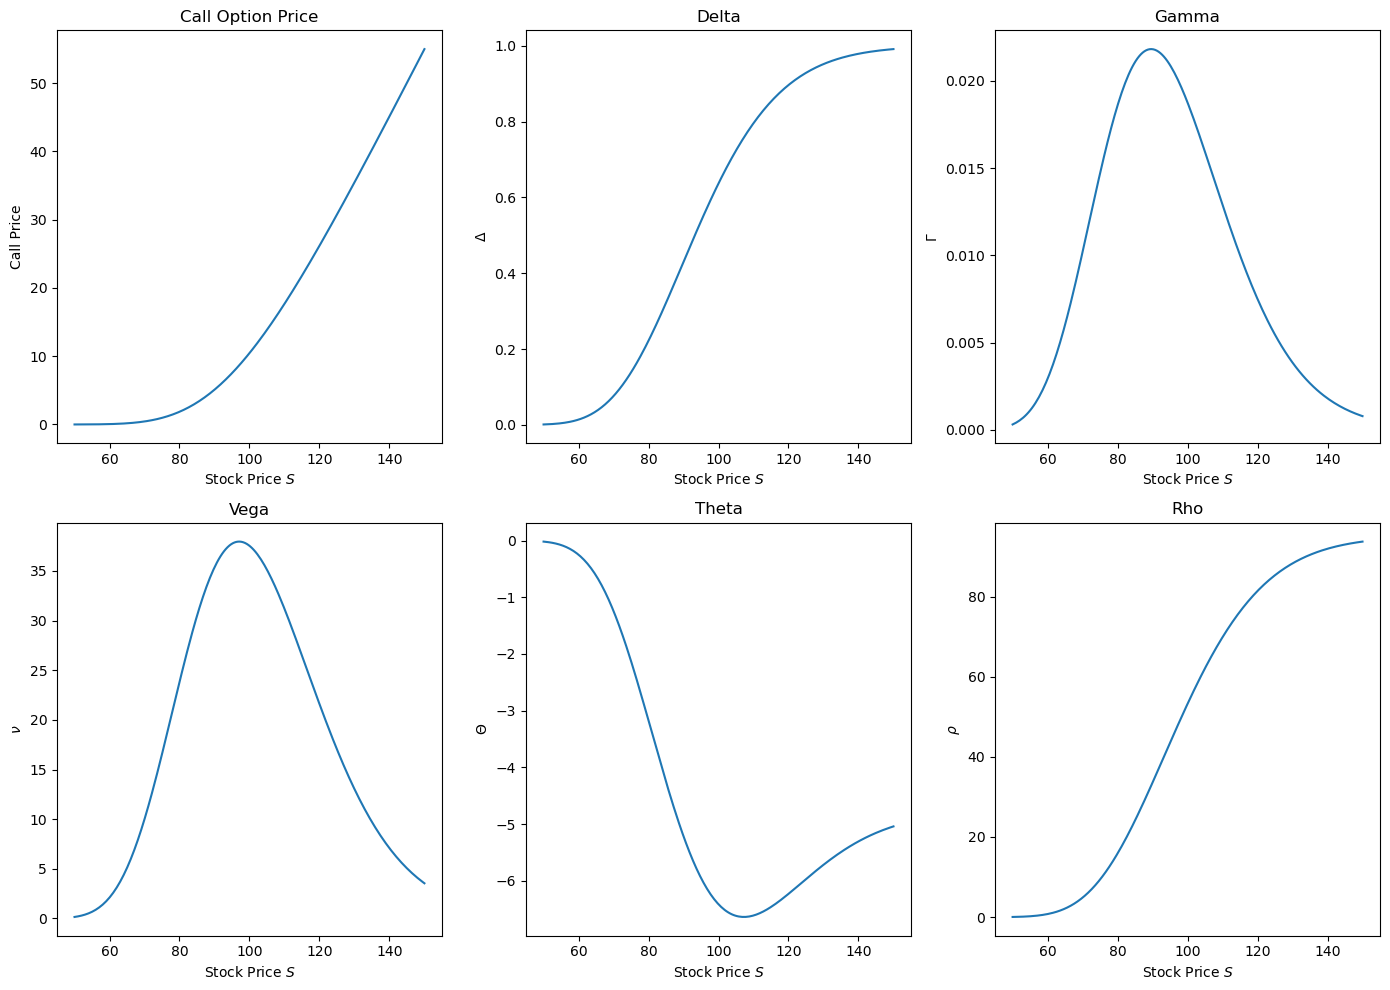

In [1]:
# Re-run code after kernel reset

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes-Merton formula and Greeks
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price, d1, d2

def delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 - term2

def rho(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Parameters
S = np.linspace(50, 150, 200)  # Stock prices
K = 100  # Strike price
T = 1.0  # Time to maturity
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Compute values
call_prices = [black_scholes_call_price(s, K, T, r, sigma)[0] for s in S]
deltas = [delta(s, K, T, r, sigma) for s in S]
gammas = [gamma(s, K, T, r, sigma) for s in S]
vegas = [vega(s, K, T, r, sigma) for s in S]
thetas = [theta(s, K, T, r, sigma) for s in S]
rhos = [rho(s, K, T, r, sigma) for s in S]

# Plot results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.plot(S, call_prices)
plt.title("Call Option Price")
plt.xlabel("Stock Price $S$")
plt.ylabel("Call Price")

plt.subplot(2, 3, 2)
plt.plot(S, deltas)
plt.title("Delta")
plt.xlabel("Stock Price $S$")
plt.ylabel(r"$\Delta$")

plt.subplot(2, 3, 3)
plt.plot(S, gammas)
plt.title("Gamma")
plt.xlabel("Stock Price $S$")
plt.ylabel(r"$\Gamma$")

plt.subplot(2, 3, 4)
plt.plot(S, vegas)
plt.title("Vega")
plt.xlabel("Stock Price $S$")
plt.ylabel(r"$\nu$")

plt.subplot(2, 3, 5)
plt.plot(S, thetas)
plt.title("Theta")
plt.xlabel("Stock Price $S$")
plt.ylabel(r"$\Theta$")

plt.subplot(2, 3, 6)
plt.plot(S, rhos)
plt.title("Rho")
plt.xlabel("Stock Price $S$")
plt.ylabel(r"$\rho$")

plt.tight_layout()
plt.show()


### Graphical Representations

- **Top Left**: Call price vs. stock price.
- **Top Middle**: Delta curve.
- **Top Right**: Gamma curve.
- **Bottom Left**: Vega curve.
- **Bottom Middle**: Theta decay.
- **Bottom Right**: Rho sensitivity.

Each plot shows how the value or sensitivity evolves as the **stock price** changes.

### Delta Hedging

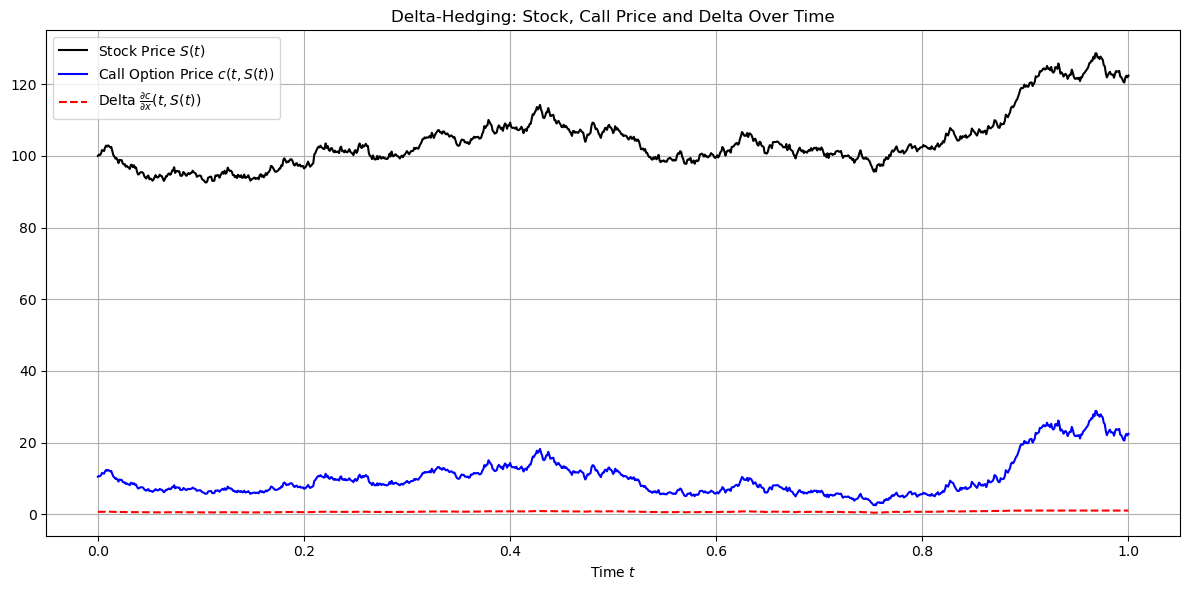

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Parameters
T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N + 1)
r = 0.05
sigma = 0.2
alpha = 0.1
S0 = 100
K = 100

# Simulate one path of geometric Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)
W = np.concatenate(([0], np.cumsum(dW)))
S = S0 * np.exp((alpha - 0.5 * sigma ** 2) * t + sigma * W)

# Black-Scholes call option price and delta (analytical)
def bs_call_price(t, S, T, K, r, sigma):
    tau = T - t
    tau[tau == 0] = 1e-10  # prevent division by zero
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

def bs_call_delta(t, S, T, K, r, sigma):
    tau = T - t
    tau[tau == 0] = 1e-10  # prevent division by zero
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1)

# Compute option price and delta
call_prices = bs_call_price(t, S, T, K, r, sigma)
deltas = bs_call_delta(t, S, T, K, r, sigma)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Stock Price $S(t)$', color='black')
plt.plot(t, call_prices, label='Call Option Price $c(t, S(t))$', color='blue')
plt.plot(t, deltas, label='Delta $\\frac{\\partial c}{\\partial x}(t, S(t))$', color='red', linestyle='--')
plt.xlabel('Time $t$')
plt.title('Delta-Hedging: Stock, Call Price and Delta Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
